In [1]:
# Logistic Regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
dataset = pd.read_csv('/content/ConsideredMeanSTDP1Authors.csv')

# Features & target variables
X = dataset.iloc[:, 1:25].values
y = dataset.iloc[:, 26].values

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameters
lr_parameters = {'C': [10**i for i in range(-3, 4)], 'penalty': ['l1', 'l2']}

# Strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize metrics
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
lr_f1_scores = []

# True labels and predictions (for confusion matrix)
all_true_labels = []
all_predictions = []

# Store the best model
best_lr_model = None
best_lr_score = 0.0

# Cross-validation
for train_index, test_index in outer_cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    lr_classifier = LogisticRegression(random_state=42)
    lr_grid_search = GridSearchCV(lr_classifier, lr_parameters, cv=inner_cv)
    lr_grid_search.fit(X_train_fold, y_train_fold)
    lr_best_params = lr_grid_search.best_params_
    lr_best_model = LogisticRegression(random_state=42, **lr_best_params)

    # Fit best model
    lr_best_model.fit(X_train_fold, y_train_fold)

    # Evaluation on test set
    lr_predictions = lr_best_model.predict(X_test_fold)
    current_score = accuracy_score(y_test_fold, lr_predictions)

    # Hold the true labels and predictions
    all_true_labels.extend(y_test_fold)
    all_predictions.extend(lr_predictions)

    # Store best model
    if current_score > best_lr_score:
        best_lr_score = current_score
        best_lr_model = lr_best_model

    # Metrics
    lr_accuracy_scores.append(accuracy_score(y_test_fold, lr_predictions))
    lr_precision_scores.append(precision_score(y_test_fold, lr_predictions))
    lr_recall_scores.append(recall_score(y_test_fold, lr_predictions))
    lr_f1_scores.append(f1_score(y_test_fold, lr_predictions))

# Save the best model
if best_lr_model is not None:
    joblib.dump(best_lr_model, 'best_logistic_regression_model.pkl')

# Test set
lr_average_accuracy_test = np.mean(lr_accuracy_scores)
lr_average_precision_test = np.mean(lr_precision_scores)
lr_average_recall_test = np.mean(lr_recall_scores)
lr_average_f1_test = np.mean(lr_f1_scores)

# Print
print("\nLogistic Regression Test Set:")
print("Accuracy:", round(lr_average_accuracy_test, 4))
print("Precision:", round(lr_average_precision_test, 4))
print("Recall:", round(lr_average_recall_test, 4))
print("F1-score:", round(lr_average_f1_test, 4))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression Test Set:
Accuracy: 0.9969
Precision: 1.0
Recall: 0.9938
F1-score: 0.9968



Overall Confusion Matrix:
[[160   0]
 [  1 159]]


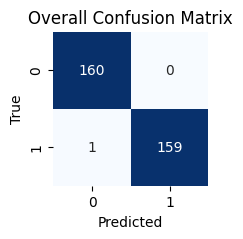

In [6]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)

# Print
print("\nOverall Confusion Matrix:")
print(conf_matrix)

# Plot
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()